In [1]:
# Convolutional autoencoder
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [2]:
import cv2
import os 
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

DIR = 'C:/Users/Leo/Desktop/Machine learning/DL_Practice/digit_recognizer'

img_size = 28
num_classes = 10
LR = 1e-3

MODEL_NAME = 'digits-{}-{}.model'.format(LR,'2conv-basic')

In [3]:
from tensorflow.python import keras
def train_data():
    file = os.path.join(DIR, 'train.csv')
    data = np.loadtxt(file, skiprows=1, delimiter=',')
    
    x = data[:,1:]
    out_x = x.reshape(len(data),img_size,img_size,1)
    out_x = out_x/np.amax(out_x)
    
    y = data[:,0]
    out_y = keras.utils.to_categorical(np.array(y),num_classes)
    
    return out_x, out_y

X_train, y_train = train_data()

print(X_train.shape, y_train.shape)

(42000, 28, 28, 1) (42000, 10)


In [25]:
input_img = Input(shape=(28,28,1))

x = Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

x = Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
autoencoder.fit(X_train[:40000],X_train[:40000], epochs=50, verbose=2, batch_size=128, shuffle=True, validation_data=(X_train[40000:],X_train[40000:]))

Train on 40000 samples, validate on 2000 samples
Epoch 1/50
 - 9s - loss: 0.2511 - acc: 0.7869 - val_loss: 0.1530 - val_acc: 0.8028
Epoch 2/50
 - 5s - loss: 0.1432 - acc: 0.8027 - val_loss: 0.1332 - val_acc: 0.8075
Epoch 3/50
 - 5s - loss: 0.1299 - acc: 0.8060 - val_loss: 0.1253 - val_acc: 0.8115
Epoch 4/50
 - 6s - loss: 0.1224 - acc: 0.8077 - val_loss: 0.1186 - val_acc: 0.8115
Epoch 5/50
 - 5s - loss: 0.1178 - acc: 0.8087 - val_loss: 0.1150 - val_acc: 0.8116
Epoch 6/50
 - 5s - loss: 0.1146 - acc: 0.8093 - val_loss: 0.1127 - val_acc: 0.8113
Epoch 7/50
 - 5s - loss: 0.1122 - acc: 0.8098 - val_loss: 0.1103 - val_acc: 0.8129
Epoch 8/50
 - 5s - loss: 0.1102 - acc: 0.8101 - val_loss: 0.1085 - val_acc: 0.8126
Epoch 9/50
 - 5s - loss: 0.1086 - acc: 0.8104 - val_loss: 0.1075 - val_acc: 0.8135
Epoch 10/50
 - 5s - loss: 0.1073 - acc: 0.8106 - val_loss: 0.1059 - val_acc: 0.8134
Epoch 11/50
 - 5s - loss: 0.1062 - acc: 0.8108 - val_loss: 0.1052 - val_acc: 0.8132
Epoch 12/50
 - 5s - loss: 0.1053 - a

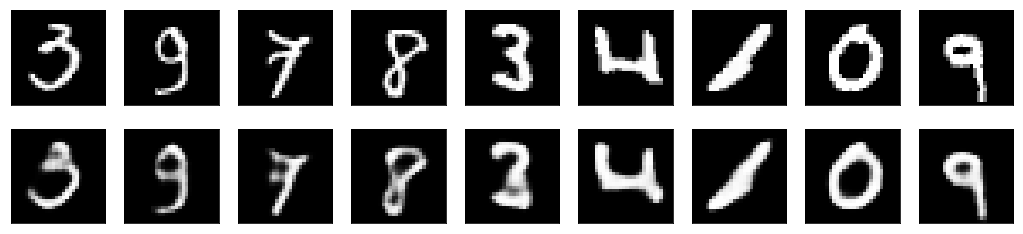

In [31]:
decoded_imgs = autoencoder.predict(X_train[40000:])

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[40000+i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
# A mix of convolutional layers and fully-connected layers
# for autoencoder

In [33]:
from keras.layers import Reshape, Flatten

In [34]:
input_img = Input(shape=(28,28,1))

#x = Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
#x = MaxPooling2D((2,2),padding='same')(x)
#x = Conv2D(8,(3,3),activation='relu',padding='same')(x)

x = Conv2D(8,(3,3),activation='relu',padding='same')(input_img)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Flatten()(x)
encoded = Dense(256,activation='relu')(x)

x = Dense(784,activation='relu')(encoded)
#784 --> 16,7,7
x = Reshape((7,7,16))(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)


autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
autoencoder.fit(X_train[:40000],X_train[:40000], epochs=50, verbose=2, batch_size=128, shuffle=True, validation_data=(X_train[40000:],X_train[40000:]))

Train on 40000 samples, validate on 2000 samples
Epoch 1/50
 - 10s - loss: 0.1895 - acc: 0.8033 - val_loss: 0.1053 - val_acc: 0.8135
Epoch 2/50
 - 9s - loss: 0.0972 - acc: 0.8122 - val_loss: 0.0900 - val_acc: 0.8155
Epoch 3/50
 - 9s - loss: 0.0874 - acc: 0.8136 - val_loss: 0.0847 - val_acc: 0.8161
Epoch 4/50
 - 9s - loss: 0.0827 - acc: 0.8141 - val_loss: 0.0807 - val_acc: 0.8168
Epoch 5/50
 - 9s - loss: 0.0797 - acc: 0.8144 - val_loss: 0.0783 - val_acc: 0.8170
Epoch 6/50
 - 9s - loss: 0.0778 - acc: 0.8145 - val_loss: 0.0767 - val_acc: 0.8171
Epoch 7/50
 - 9s - loss: 0.0763 - acc: 0.8147 - val_loss: 0.0753 - val_acc: 0.8172
Epoch 8/50
 - 9s - loss: 0.0752 - acc: 0.8147 - val_loss: 0.0746 - val_acc: 0.8172
Epoch 9/50
 - 9s - loss: 0.0743 - acc: 0.8148 - val_loss: 0.0733 - val_acc: 0.8173
Epoch 10/50
 - 9s - loss: 0.0735 - acc: 0.8148 - val_loss: 0.0730 - val_acc: 0.8174
Epoch 11/50
 - 9s - loss: 0.0729 - acc: 0.8149 - val_loss: 0.0721 - val_acc: 0.8174
Epoch 12/50
 - 9s - loss: 0.0722 - 

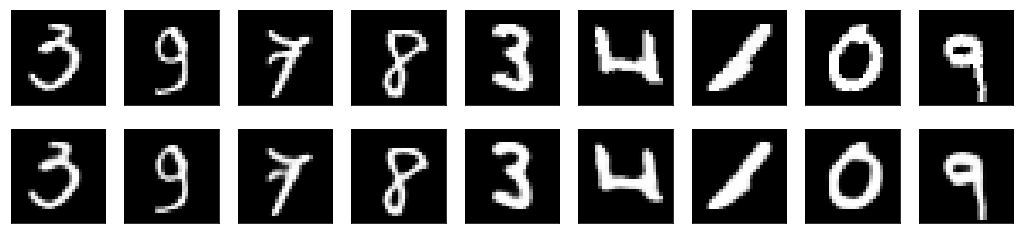

In [36]:
decoded_imgs = autoencoder.predict(X_train[40000:])

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[40000+i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
28*28

784

In [6]:
# Fully connected layers only

In [27]:
input_img = Input(shape=(28,28))
#x = Flatten()(input_img)
x = Reshape((784,))(input_img)
print(x.shape)
x = Dense(128,activation='relu')(x)
print(x.shape)
encoded = Dense(32,activation='relu')(x)
print(x.shape)

x = Dense(128,activation='relu')(encoded)
print(x.shape)
decoded = Dense(784,activation='sigmoid')(x)
print(x.shape)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(?, 784)
(?, 128)
(?, 128)
(?, 128)
(?, 128)


In [24]:
encoder = Model(input_img,encoded)

In [25]:
autoencoder.fit(X_train[:40000], X_train[:40000],
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_train[40000:], X_train[40000:]))

ValueError: Error when checking input: expected input_8 to have 3 dimensions, but got array with shape (40000, 28, 28, 1)

In [5]:
# Directly from the examples
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [7]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [8]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


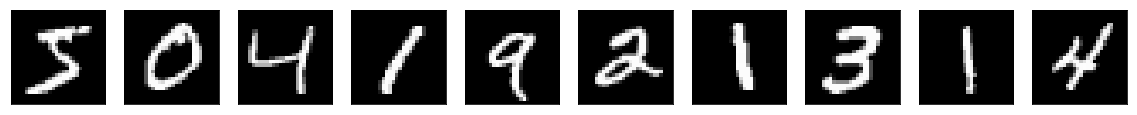

In [19]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=50, verbose=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.1354 - acc: 0.8095 - val_loss: 0.1328 - val_acc: 0.8089
Epoch 2/50
 - 2s - loss: 0.1331 - acc: 0.8098 - val_loss: 0.1308 - val_acc: 0.8094
Epoch 3/50
 - 2s - loss: 0.1311 - acc: 0.8101 - val_loss: 0.1287 - val_acc: 0.8096
Epoch 4/50
 - 2s - loss: 0.1291 - acc: 0.8104 - val_loss: 0.1267 - val_acc: 0.8098
Epoch 5/50
 - 2s - loss: 0.1273 - acc: 0.8106 - val_loss: 0.1249 - val_acc: 0.8099
Epoch 6/50
 - 2s - loss: 0.1255 - acc: 0.8109 - val_loss: 0.1231 - val_acc: 0.8101
Epoch 7/50
 - 2s - loss: 0.1238 - acc: 0.8111 - val_loss: 0.1215 - val_acc: 0.8105
Epoch 8/50
 - 2s - loss: 0.1222 - acc: 0.8113 - val_loss: 0.1200 - val_acc: 0.8106
Epoch 9/50
 - 2s - loss: 0.1207 - acc: 0.8115 - val_loss: 0.1186 - val_acc: 0.8108
Epoch 10/50
 - 2s - loss: 0.1193 - acc: 0.8117 - val_loss: 0.1171 - val_acc: 0.8110
Epoch 11/50
 - 2s - loss: 0.1180 - acc: 0.8119 - val_loss: 0.1158 - val_acc: 0.8112
Epoch 12/50
 - 1s - loss: 0.1167 - 

In [17]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

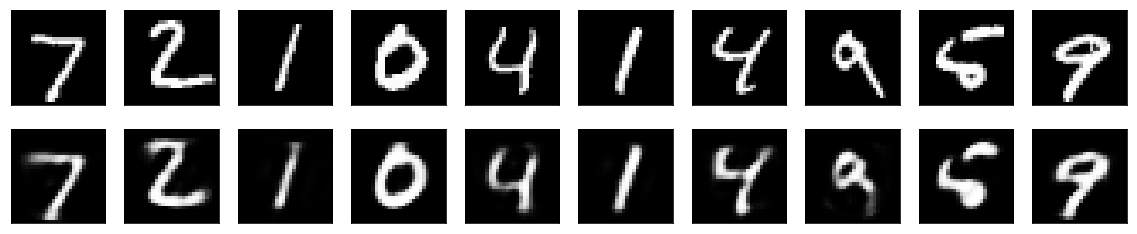

In [18]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
# regularizers
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [22]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
autoencoder.fit(x_train, x_train,
                epochs=50, verbose=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 0.6733 - acc: 0.7813 - val_loss: 0.6485 - val_acc: 0.8029
Epoch 2/50
 - 2s - loss: 0.6284 - acc: 0.8043 - val_loss: 0.6090 - val_acc: 0.8030
Epoch 3/50
 - 2s - loss: 0.5916 - acc: 0.8043 - val_loss: 0.5749 - val_acc: 0.8030
Epoch 4/50
 - 2s - loss: 0.5598 - acc: 0.8044 - val_loss: 0.5454 - val_acc: 0.8030
Epoch 5/50
 - 2s - loss: 0.5323 - acc: 0.8044 - val_loss: 0.5198 - val_acc: 0.8030
Epoch 6/50
 - 1s - loss: 0.5084 - acc: 0.8044 - val_loss: 0.4975 - val_acc: 0.8030
Epoch 7/50
 - 2s - loss: 0.4875 - acc: 0.8044 - val_loss: 0.4780 - val_acc: 0.8030
Epoch 8/50
 - 2s - loss: 0.4692 - acc: 0.8044 - val_loss: 0.4609 - val_acc: 0.8030
Epoch 9/50
 - 2s - loss: 0.4531 - acc: 0.8044 - val_loss: 0.4457 - val_acc: 0.8030
Epoch 10/50
 - 2s - loss: 0.4389 - acc: 0.8044 - val_loss: 0.4324 - val_acc: 0.8030
Epoch 11/50
 - 2s - loss: 0.4262 - acc: 0.8044 - val_loss: 0.4205 - val_acc: 0.8030
Epoch 12/50
 - 1s - loss: 0.4150 - 

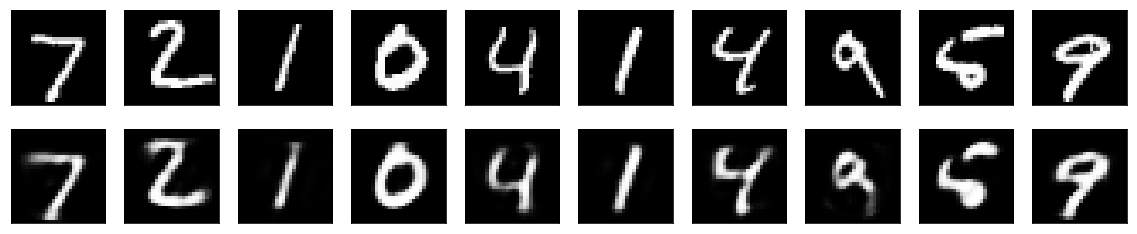

In [24]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
# VAE for train_x and train_y
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

timesteps = 10
input_dim = 784#(28,28)
latent_dim = 10

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [43]:
batch_size = 100

x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

NameError: name 'original_dim' is not defined

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os


# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as function of 2-dim latent vector
    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()


# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    help_ = "Load h5 model trained weights"
    parser.add_argument("-w", "--weights", help=help_)
    help_ = "Use mse loss instead of binary cross entropy (default)"
    parser.add_argument("-m",
                        "--mse",
                        help=help_, action='store_true')
    args = parser.parse_args()
    models = (encoder, decoder)
    data = (x_test, y_test)

    # VAE loss = mse_loss or xent_loss + kl_loss
    if args.mse:
        reconstruction_loss = mse(inputs, outputs)
    else:
        reconstruction_loss = binary_crossentropy(inputs,
                                                  outputs)

    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    vae.summary()
    plot_model(vae,
               to_file='vae_mlp.png',
               show_shapes=True)

    if args.weights:
        vae.load_weights(args.weights)
    else:
        # train the autoencoder
        vae.fit(x_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(x_test, None))
        vae.save_weights('vae_mlp_mnist.h5')

    plot_results(models,
                 data,
                 batch_size=batch_size,
                 model_name="vae_mlp")

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z (Lambda)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.